# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load The Dataset

In [2]:
titanic_data=pd.read_csv('titanic.csv')

# Data Inspection

In [3]:
titanic_data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic_data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [7]:
titanic_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [8]:
titanic_data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
titanic_data['age'].fillna(titanic_data['age'].median(),inplace=True)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0],inplace=True)
titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0],inplace=True)
titanic_data['deck'].fillna(titanic_data['deck'].mode()[0],inplace=True)

# Exploratory Data Analysis (EDA)

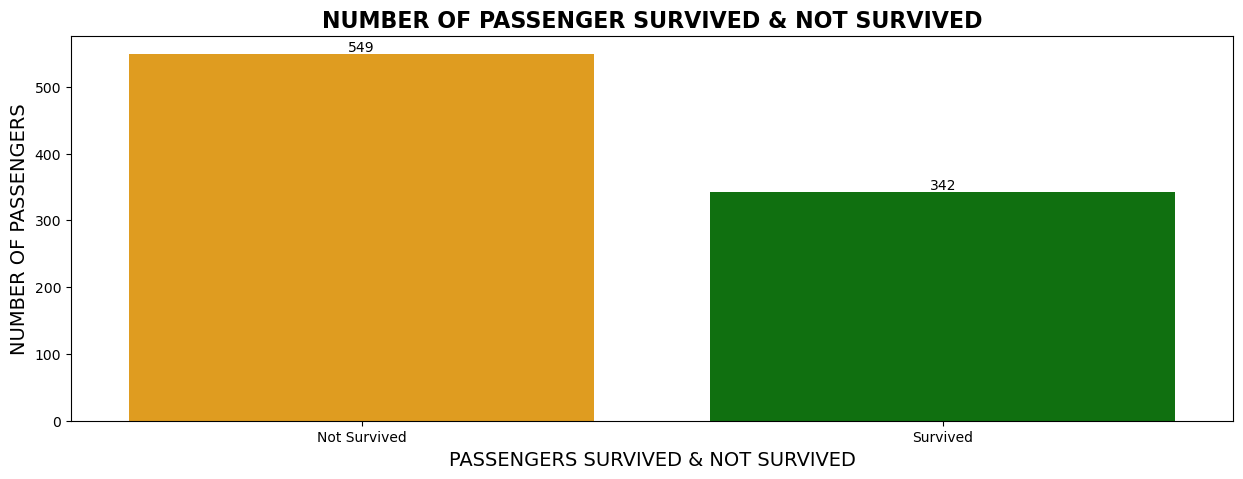

In [10]:
plt.subplots(figsize=(15,5))
survived=sns.countplot(x='survived',data=titanic_data,palette={'orange','green'})
plt.title('NUMBER OF PASSENGER SURVIVED & NOT SURVIVED',fontweight='bold',fontsize=16)
plt.xlabel('PASSENGERS SURVIVED & NOT SURVIVED',fontsize=14)
plt.ylabel('NUMBER OF PASSENGERS',fontsize=14)
plt.xticks([0,1],['Not Survived','Survived'])
for bar in survived.containers:
    survived.bar_label(bar)
plt.show()

 The number of passengers who did not survive was significantly higher than those who did.

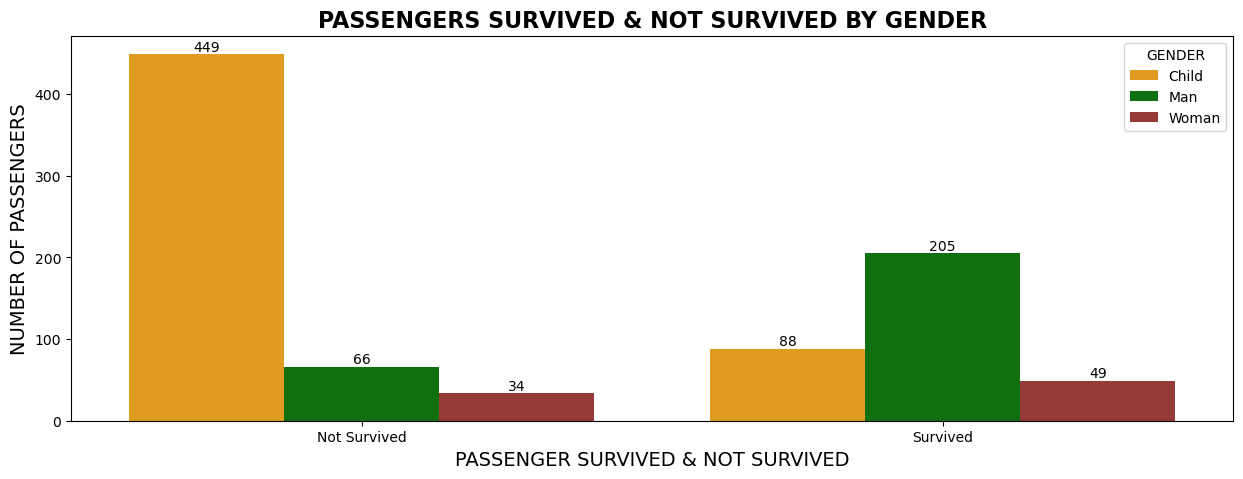

In [11]:
plt.subplots(figsize=(15,5))
Survived_byGen=sns.countplot(x='survived',hue='who',data=titanic_data,palette={'woman':'green',
                                                                                       'man':'orange','child':'brown'})
plt.title('PASSENGERS SURVIVED & NOT SURVIVED BY GENDER',fontweight='bold',fontsize=16)
plt.xlabel('PASSENGER SURVIVED & NOT SURVIVED',fontsize=14)
plt.ylabel('NUMBER OF PASSENGERS',fontsize=14)
plt.xticks([0,1],['Not Survived','Survived'])
handles,labels=Survived_byGen.get_legend_handles_labels()
labels=['Child','Man','Woman']
plt.legend(title='GENDER',labels=labels,handles=handles)
for bar in Survived_byGen.containers:
    Survived_byGen.bar_label(bar)
plt.show()

The Survival Rate of Men is greater than Children and Women & Mortality Rate  of Children is greater than Men & Women.

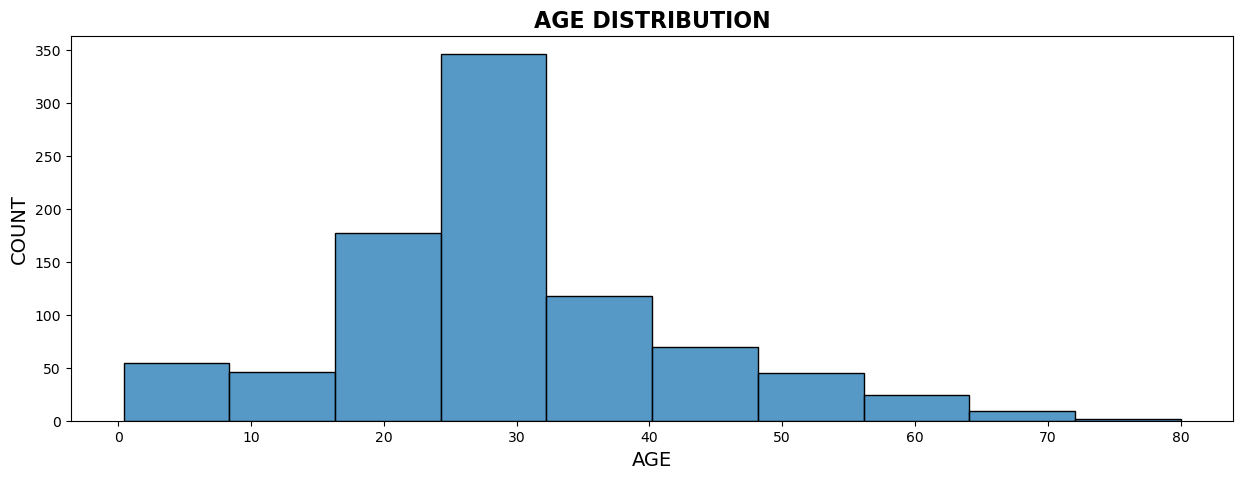

In [12]:
plt.subplots(figsize=(15,5))
age=sns.histplot(x='age',bins=10,data=titanic_data)
plt.title('AGE DISTRIBUTION',fontweight='bold',fontsize=16)
plt.xlabel('AGE',fontsize=14)
plt.ylabel('COUNT',fontsize=14)
plt.show()

The age distribution showed a wide range of ages among passengers, with a notable number of children and elderly.

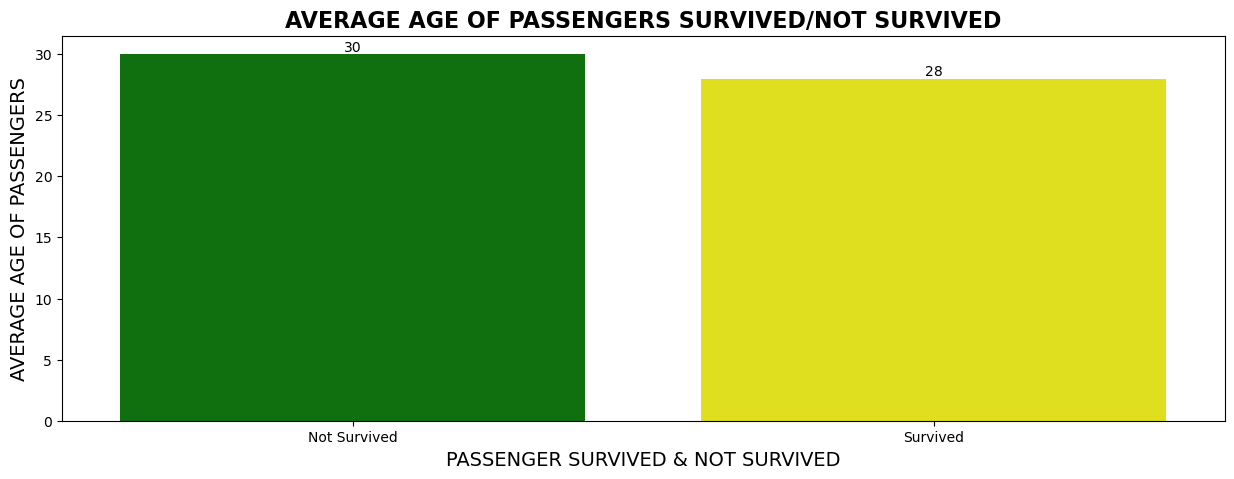

In [13]:
plt.subplots(figsize=(15,5))
Sur_Age=round(titanic_data.groupby(['survived'],as_index=False)['age'].mean())
Survived_Age_plot=sns.barplot(x='survived',y='age',data=Sur_Age,palette=['green','yellow'])
plt.title('AVERAGE AGE OF PASSENGERS SURVIVED/NOT SURVIVED',fontweight='bold',fontsize=16)
plt.xlabel('PASSENGER SURVIVED & NOT SURVIVED',fontsize=14)
plt.ylabel('AVERAGE AGE OF PASSENGERS',fontsize=14)
plt.xticks([0,1],['Not Survived','Survived'])
for bar in Survived_Age_plot.containers:
    Survived_Age_plot.bar_label(bar)
plt.show()

Average Age of survived passengers is 28 years. 

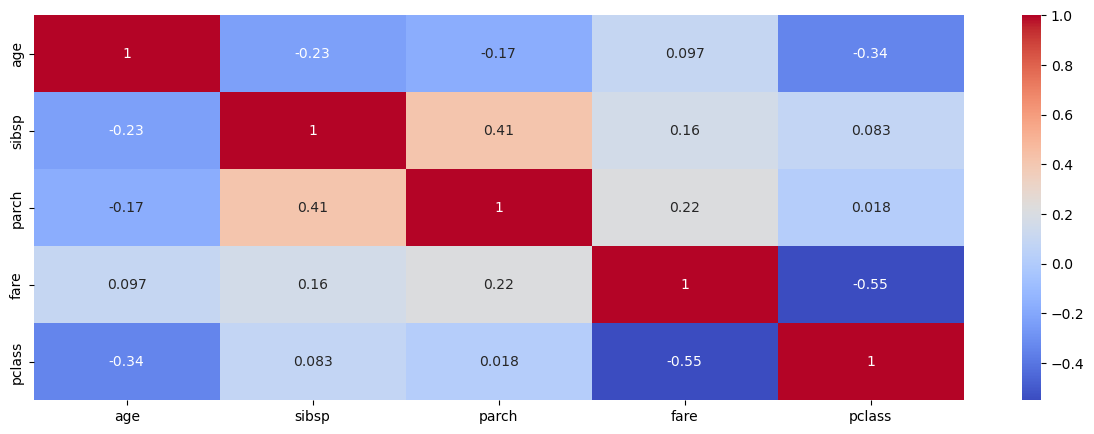

In [14]:
# Correlation Matrix
plt.subplots(figsize=(15,5))
num_titanic_data=titanic_data[['age', 'sibsp', 'parch', 'fare','pclass']]
corr=sns.heatmap(num_titanic_data.corr(),annot=True,cmap='coolwarm')
plt.show()

The heatmap reveals that there is a strong positive correlation between 'sibsp' (number of siblings/spouses aboard) and 'parch' (number of parents/children aboard) among Titanic passengers.

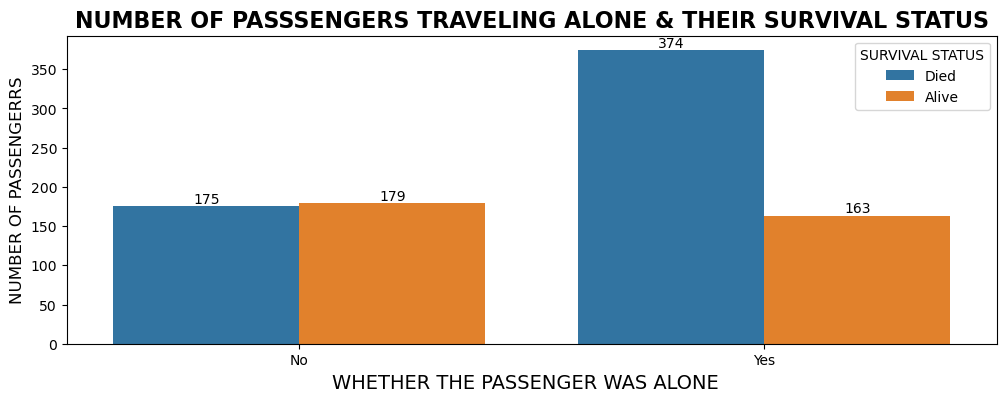

In [15]:
plt.subplots(figsize=(12,4))
survived_alone=sns.countplot(x='alone',hue='survived',data=titanic_data)
plt.title('NUMBER OF PASSSENGERS TRAVELING ALONE & THEIR SURVIVAL STATUS',fontweight='bold',fontsize=16)
plt.xlabel('WHETHER THE PASSENGER WAS ALONE  ',fontsize=14)
plt.ylabel('NUMBER OF PASSENGERRS',fontsize=12)
plt.xticks([False,True],['No','Yes'])
plt.legend(title='SURVIVAL STATUS',labels=['Died','Alive'])
for bar in survived_alone.containers:
    survived_alone.bar_label(bar)

Those who did not travel alone, a higher number survived and among those who traveled alone, a higher number did not survive.

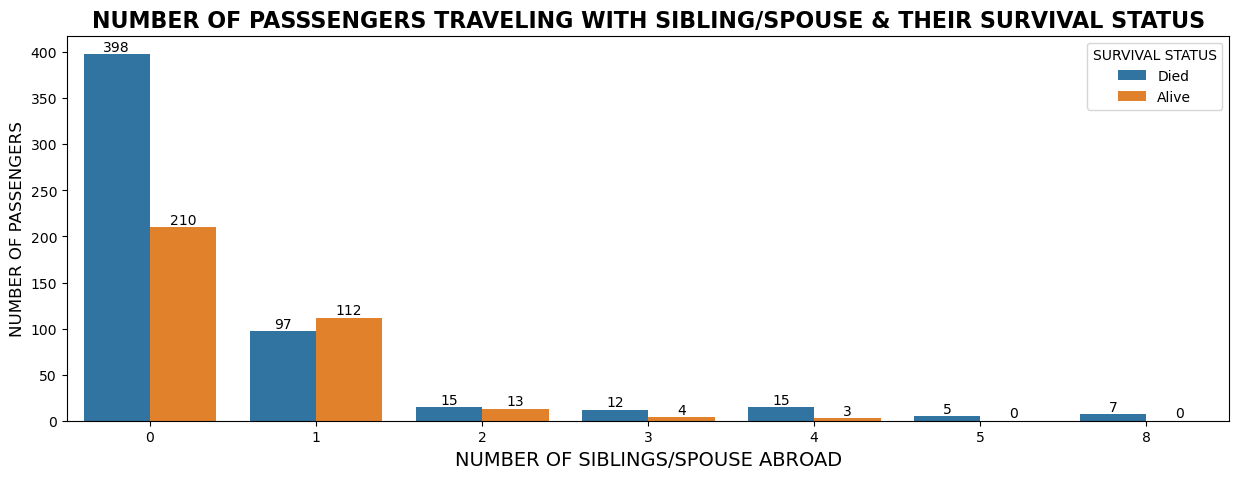

In [16]:
plt.subplots(figsize=(15,5))
survived_sibsp=sns.countplot(x='sibsp',hue='survived',data=titanic_data)
plt.title('NUMBER OF PASSSENGERS TRAVELING WITH SIBLING/SPOUSE & THEIR SURVIVAL STATUS',fontweight='bold',fontsize=16)
plt.xlabel('NUMBER OF SIBLINGS/SPOUSE ABROAD',fontsize=14)
plt.ylabel('NUMBER OF PASSENGERS',fontsize=12)
plt.legend(title='SURVIVAL STATUS',labels=['Died','Alive'])
for bar in survived_sibsp.containers:
    survived_sibsp.bar_label(bar)

Solo travelers or those with one sibling/spouse had higher survival rates, while larger groups generally faced lower survival rates.

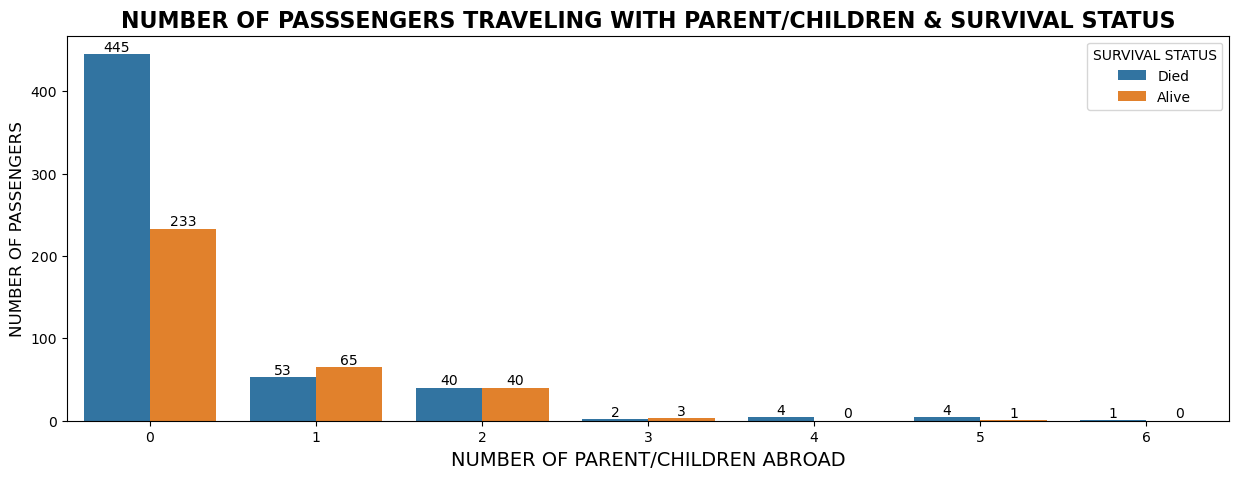

In [17]:
plt.subplots(figsize=(15,5))
survived_parch=sns.countplot(x='parch',hue='survived',data=titanic_data)
plt.title('NUMBER OF PASSSENGERS TRAVELING WITH PARENT/CHILDREN & SURVIVAL STATUS',fontweight='bold',fontsize=16)
plt.xlabel('NUMBER OF PARENT/CHILDREN ABROAD',fontsize=14)
plt.ylabel('NUMBER OF PASSENGERS',fontsize=12)
plt.legend(title='SURVIVAL STATUS',labels=['Died','Alive'])
for bar in survived_parch.containers:
    survived_parch.bar_label(bar)

Passengers traveling alone or with one parent/child had higher survival rates, while those with more parents/children had mixed survival outcomes.

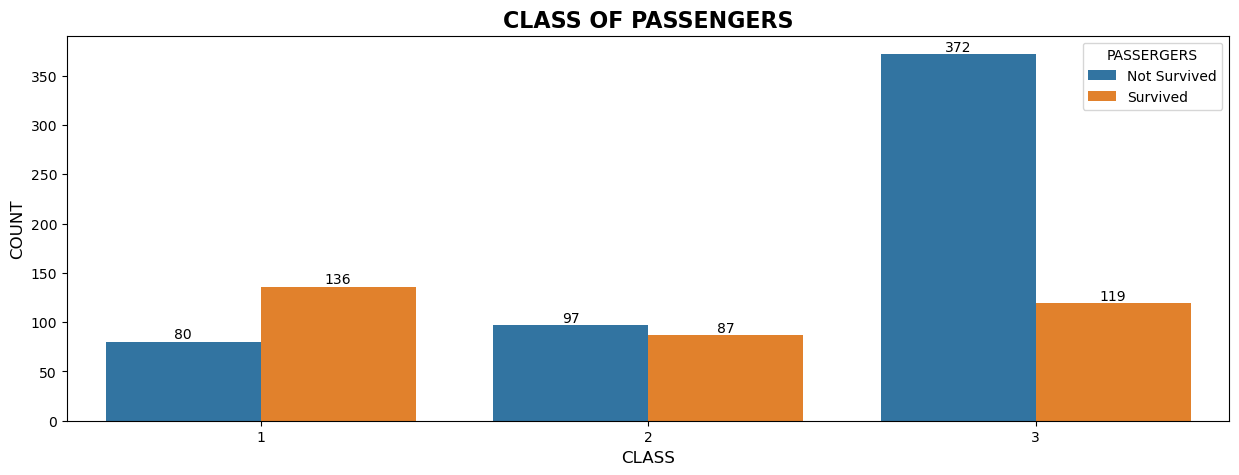

In [18]:
plt.subplots(figsize=(15,5))
survived_class=sns.countplot(x='pclass',hue='survived',data=titanic_data)
plt.legend(title='PASSERGERS',labels=['Not Survived','Survived'])
plt.title('CLASS OF PASSENGERS',fontweight='bold',fontsize=16)
plt.xlabel('CLASS',fontsize=12)
plt.ylabel('COUNT',fontsize=12)
for bar in survived_class.containers:
    survived_class.bar_label(bar)

First-class passengers had a higher survival rate compared to second and third-class passengers, showing the impact of socio-economic status on survival chances.

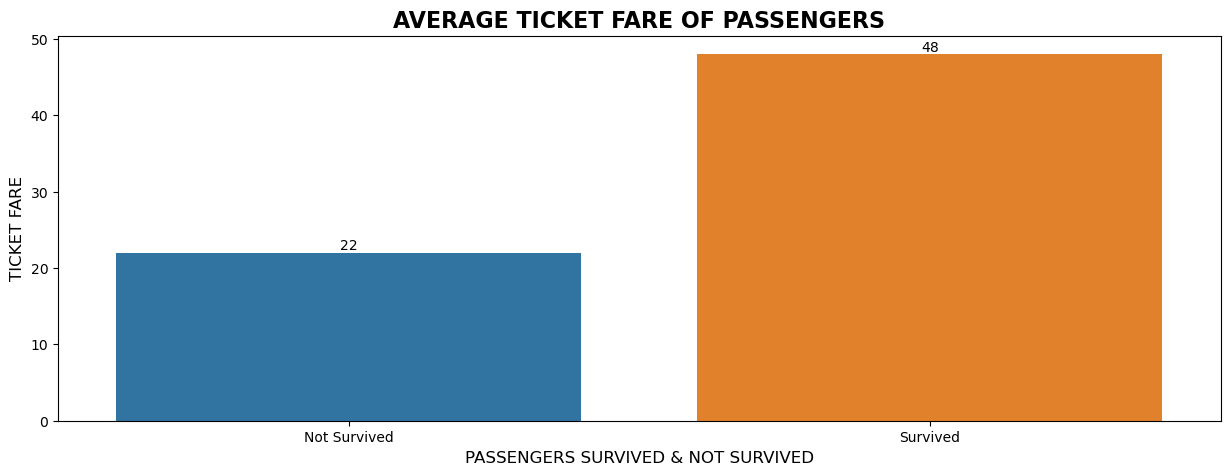

In [19]:
plt.subplots(figsize=(15,5))
sur_fare=round(titanic_data.groupby(['survived'],as_index=False)['fare'].mean())
sur_fare_plot=sns.barplot(x='survived',y='fare',data=sur_fare)
plt.title('AVERAGE TICKET FARE OF PASSENGERS',fontweight='bold',fontsize=16)
plt.xlabel('PASSENGERS SURVIVED & NOT SURVIVED',fontsize=12)
plt.ylabel('TICKET FARE',fontsize=12)
plt.xticks([0,1],['Not Survived','Survived'])
for bar in sur_fare_plot.containers:
    sur_fare_plot.bar_label(bar)

Passengers who survived the Titanic disaster paid higher average ticket fares than those who did not survive.

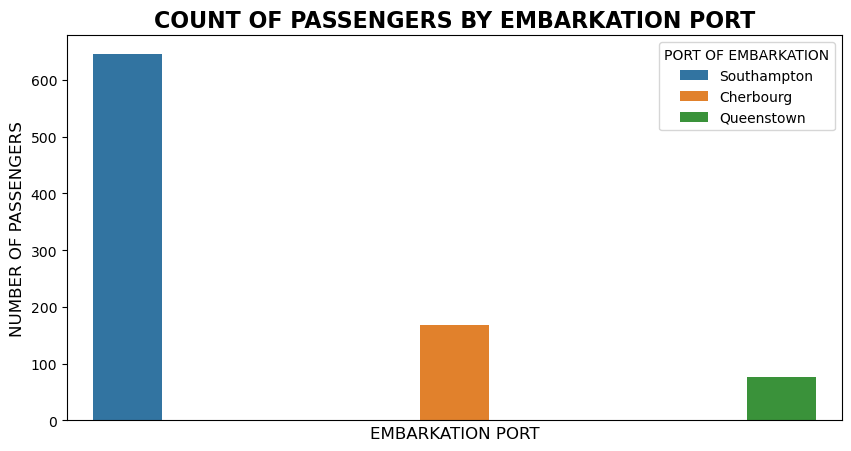

In [20]:
plt.subplots(figsize=(10,5))
pembarked=sns.countplot(x='embarked',hue='embark_town',data=titanic_data)
plt.title('COUNT OF PASSENGERS BY EMBARKATION PORT',fontweight='bold',fontsize=16)
plt.xlabel('EMBARKATION PORT',fontsize=12)
plt.ylabel('NUMBER OF PASSENGERS',fontsize=12)
pembarked.set_xticks([])
plt.legend(title='PORT OF EMBARKATION')
plt.show()

Most of the passengers are from Southampton as compared to Cherbourg and Queenstown.

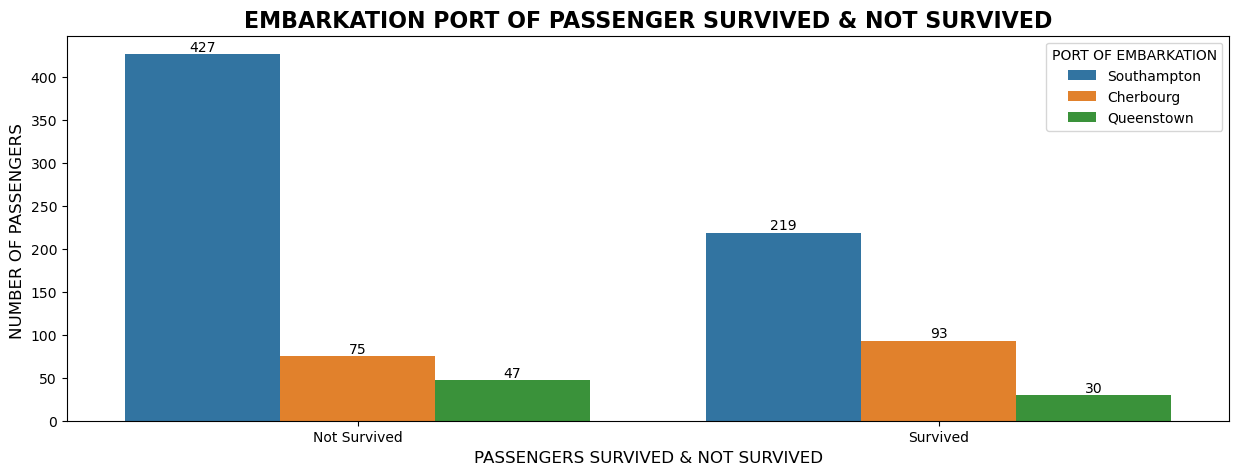

In [21]:
plt.subplots(figsize=(15,5))
sur_embarked=sns.countplot(x='survived',hue='embarked',data=titanic_data)
plt.title('EMBARKATION PORT OF PASSENGER SURVIVED & NOT SURVIVED',fontweight='bold',fontsize=16)
plt.xlabel('PASSENGERS SURVIVED & NOT SURVIVED',fontsize=12)
plt.ylabel('NUMBER OF PASSENGERS ',fontsize=12)
plt.legend(title='PORT OF EMBARKATION',labels=['Southampton', 'Cherbourg', 'Queenstown'])
plt.xticks([0,1],['Not Survived','Survived'])
for bar in sur_embarked.containers:
    sur_embarked.bar_label(bar)

Passengers who survived were more likely to embark from Southampton, while those who did not survive were  from Cherbourg  and Queenstown.

# Conclusion

The analysis reveals that a higher number of passengers did not survive the Titanic disaster, with men having a higher survival rate than children and women. Survived passengers were generally younger (average age 28), often traveled in first class, paid higher fares, and were more likely to embark from Southampton. Survival rates were higher for those traveling with one or no companions, while larger groups had lower survival rates. A positive correlation was found between the number of siblings/spouses and parents/children aboard.